# 1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.

In [132]:
import numpy as np
import matplotlib.pyplot as plt

#cost fynction
def cost_func(X,y,wb):
    m = len(y)
    pred = X.dot(wb)
    cost = 1/(2*m) * np.sum(np.square(pred - y))
    return cost

# gradient descent rule
def grad_descent(X,y,wb,eta,iterations):
    m = len(y)
    cost_path = np.zeros(iterations)
    for i in range(iterations):
        grad = (1/m) * X.T.dot(X.dot(wb) - y)
        wb = wb - eta * grad
        cost_path[i] = cost_func(X, y, wb)

    return wb, cost_path

# 2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line. 

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('univariate_linear_regression.csv')
# print(df)
# plt.plot(df)
# df = df.drop(df.columns[0], axis=1)
# print(df)

# x and y values
x = list(df.x)  
y = list(df.y)  

# print(type(y))
# print(len(y))
# print(x,y)
x = np.array(x)
y = np.array(y)
print(y)

x = x.reshape(200,1)
y = y.reshape(200,1)

# print(x.shape)
print(y)

[-1.3569e+01 -1.9207e+01  1.7665e+01  1.5835e+01 -4.9500e-01 -1.7858e+01
  2.0099e+01 -7.4370e+00  1.0686e+01 -2.8680e+00 -3.2933e+01 -9.6830e+00
 -3.1860e+00  4.6770e+00 -4.0467e+01 -4.0042e+01  3.2890e+00 -1.6939e+01
 -3.4719e+01  5.0310e+00 -1.4059e+01 -3.5892e+01  1.2817e+01 -8.3520e+00
  8.8900e-01 -7.0380e+00 -4.4920e+00 -5.5790e+00  1.0378e+01 -3.2469e+01
  1.3577e+01 -3.0866e+01 -3.7810e+01 -1.3240e+00 -2.5480e+00 -2.3459e+01
  1.5207e+01 -3.0320e+01  1.2515e+01 -3.7875e+01 -4.2360e+00 -3.1050e+00
 -1.6782e+01 -2.6881e+01  1.4355e+01 -3.3895e+01 -1.4833e+01 -1.5333e+01
 -6.4650e+00 -1.1412e+01 -2.1217e+01  1.7020e+01  1.4410e+00 -7.1030e+00
  1.1959e+01  1.0080e+00  1.4531e+01  1.2731e+01  7.7890e+00 -2.4142e+01
 -1.7770e+01 -2.1929e+01  2.0445e+01  1.9432e+01 -7.9680e+00  2.0998e+01
 -2.4261e+01  6.0000e-03 -6.8790e+00 -4.3270e+00 -1.9175e+01  2.2070e+00
  7.7890e+00  1.8030e+00 -6.7710e+00 -6.9950e+00  5.4980e+00  4.0640e+00
 -1.0547e+01 -1.2930e+01 -1.0341e+01  1.2202e+01 -1

In [134]:
# adding a column of ones to x for bias
X_b = np.c_[np.ones((len(x), 1)), x]

# Initial weights
wb_initial = np.zeros((2, 1))

eta = 0.01  # Learning rate
iterations = 1000

# gradient descent to find the optimal weights
wb_optimal, cost_path = grad_descent(X_b, y, wb_initial, eta, iterations)
print('The final weights are: \n ',wb_optimal)


# the surface and contour plot of the cost function
# initial grid of wb values for plotting
wb0_vals = np.linspace(-12, 0, 100)
wb1_vals = np.linspace(-8, 12, 100)
J_vals = np.zeros((len(wb0_vals), len(wb1_vals)))

# cost for each combination of wb0 and wb1
for i in range(len(wb0_vals)):
    for j in range(len(wb1_vals)):
        t = np.array([[wb0_vals[i]], [wb1_vals[j]]])
        J_vals[i, j] = cost_func(X_b, y, t)

# for meshgrids we need to transpose J_vals
J_vals = J_vals.T

wb0_vals, wb1_vals = np.meshgrid(wb0_vals, wb1_vals)

The final weights are: 
  [[-10.06465193]
 [  2.97261411]]


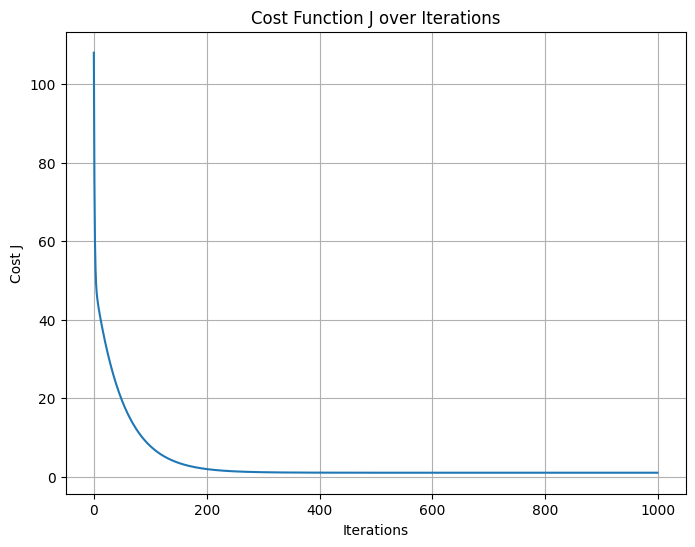

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(cost_path)
plt.title('Cost Function J over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.grid(True)
plt.show()

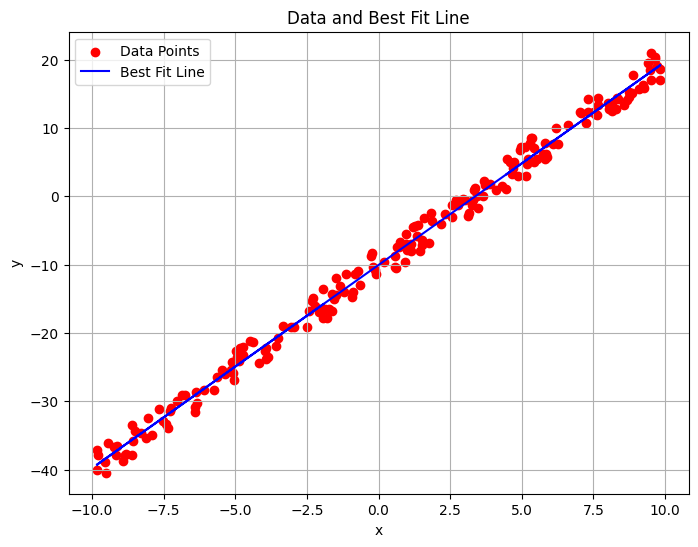

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', marker='o', label='Data Points')
prediction = X_b.dot(wb_optimal)
plt.plot(x, prediction, color='blue', label='Best Fit Line')
plt.title('Data and Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

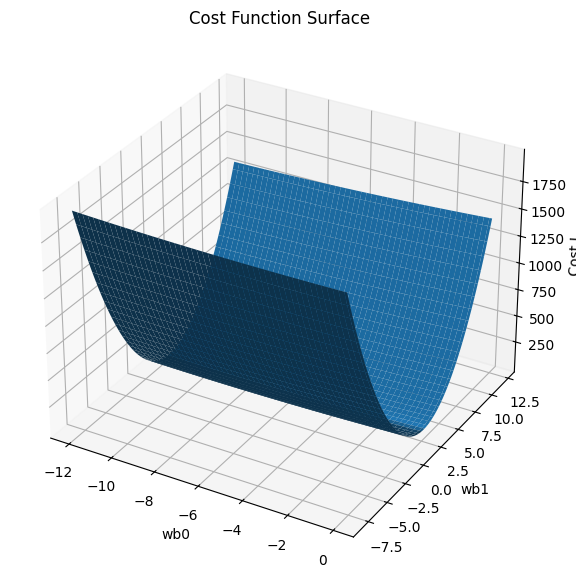

In [137]:
from mpl_toolkits.mplot3d import Axes3D

# wb0_vals, wb1_vals, and J_vals are already defined
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # for creating a 3D plot
surf = ax.plot_surface(wb0_vals, wb1_vals, J_vals)
ax.set_title('Cost Function Surface')
ax.set_xlabel('wb0')
ax.set_ylabel('wb1')
ax.set_zlabel('Cost J')
plt.show()

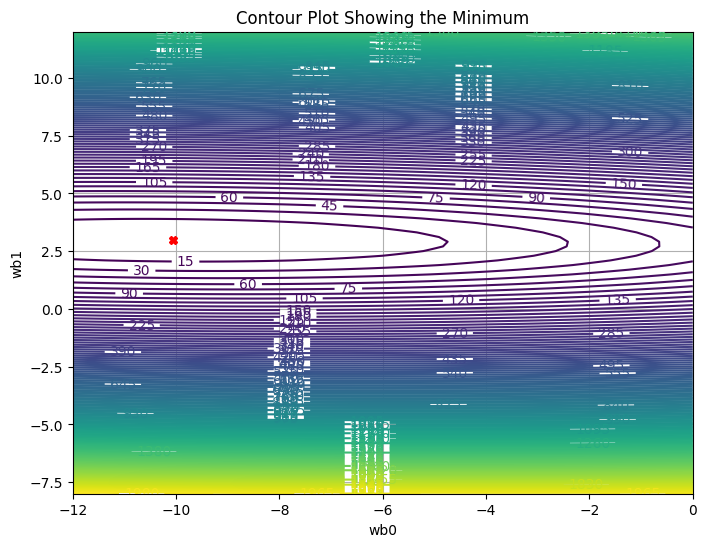

In [138]:
plt.figure(figsize=(8, 6))
contour = plt.contour(wb0_vals, wb1_vals, J_vals, levels=150)
plt.plot(wb_optimal[0], wb_optimal[1], 'rX')  # Optimal point
plt.title('Contour Plot Showing the Minimum')
plt.xlabel('wb0')
plt.ylabel('wb1')
plt.clabel(contour, inline=1, fontsize=10)
plt.grid(True)
plt.show()

# 3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?

The final weights are: 
  [10.17409882 -4.29464595  1.47680287]


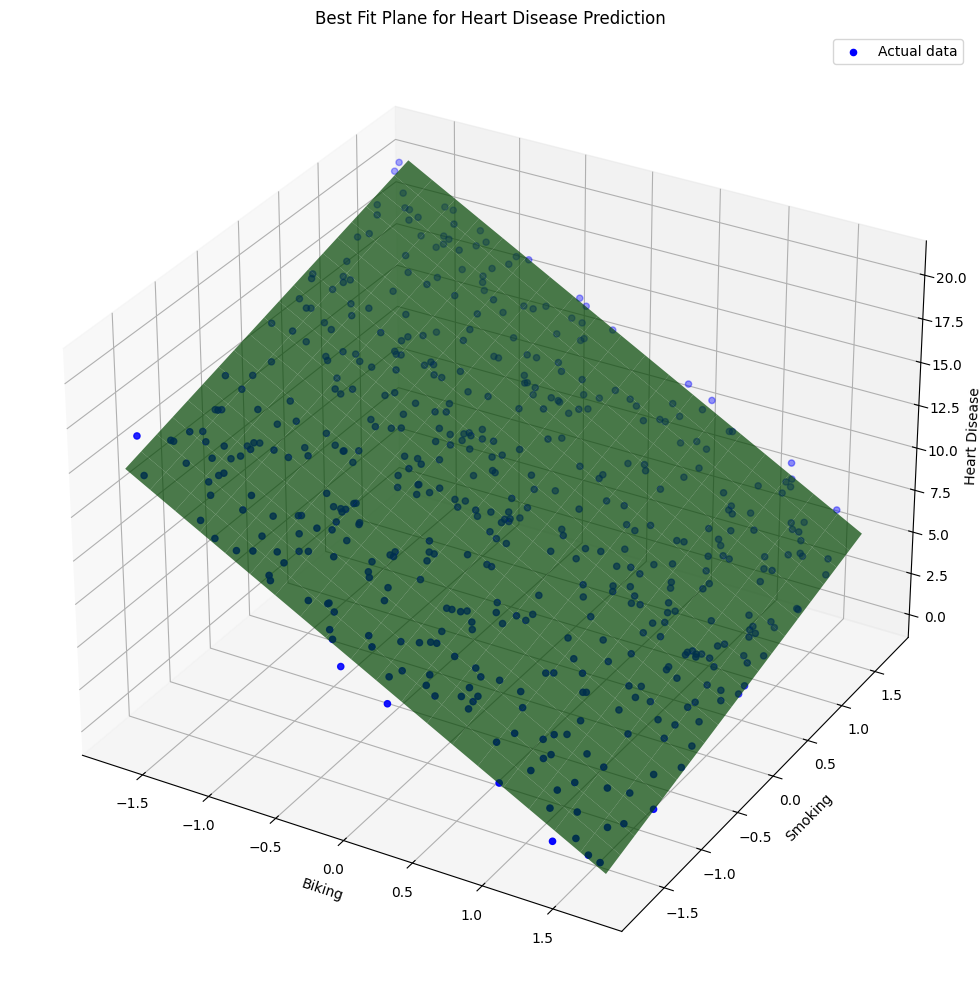

In [139]:
# the dataset
data = pd.read_csv('heart.data.csv')

# features and target
X = data[['biking', 'smoking']].values
y = data['heart.disease'].values

# normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Adding a column for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))  #every row in X starts with a 1, followed by the original features

# Initializing parameters for gradient descent
wb_initial = np.zeros(X.shape[1])
eta = 0.01  # learning rate
iterations = 1000

# gradient descent
wb, cost_path_heart = grad_descent(X, y, wb_initial, eta, iterations)
print('The final weights are: \n ',wb)

# the best fit plane
fig = plt.figure()
# 3D subplot
# The list [left, bottom, width, height] specifies the location and size of the 3D plot
ax = fig.add_axes([0, 0, 2, 2], projection='3d')

# Scatter plot of original data
ax.scatter(X[:, 1], X[:, 2], y, color='b', label='Actual data')

# a meshgrid for the plane
x_surface, y_surface = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 20), 
                                   np.linspace(X[:, 2].min(), X[:, 2].max(), 20))
z_surface = wb[0] + wb[1] * x_surface + wb[2] * y_surface

# Plot the surface
ax.plot_surface(x_surface, y_surface, z_surface, color='g', alpha=0.7)

ax.set_xlabel('Biking')
ax.set_ylabel('Smoking')
ax.set_zlabel('Heart Disease')
plt.title('Best Fit Plane for Heart Disease Prediction')
# ax.view_init(elev=10, azim=80)  # Adjust the elevation and azimuth
plt.legend()
plt.show()

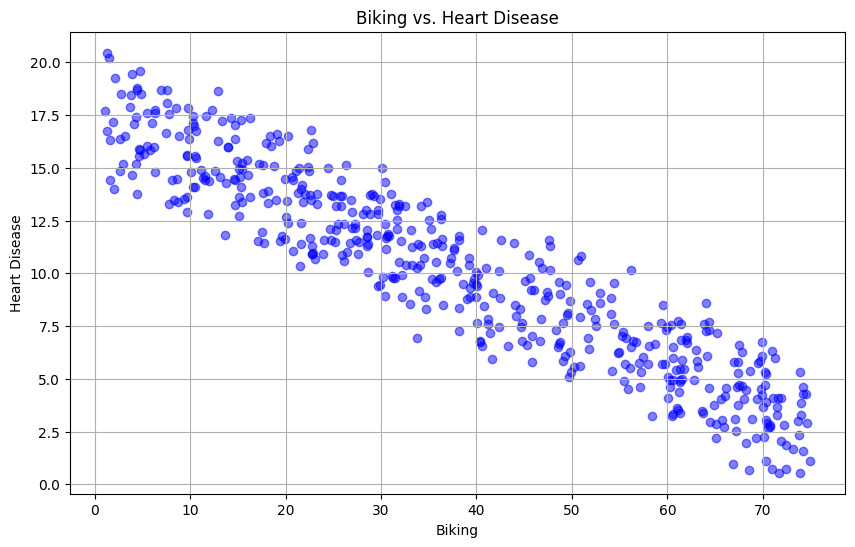

In [140]:
biking = data['biking']
heart_disease = data['heart.disease']

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(biking, heart_disease, color='blue', alpha=0.5)
plt.title('Biking vs. Heart Disease')
plt.xlabel('Biking')
plt.ylabel('Heart Disease')
plt.grid(True)
plt.show()

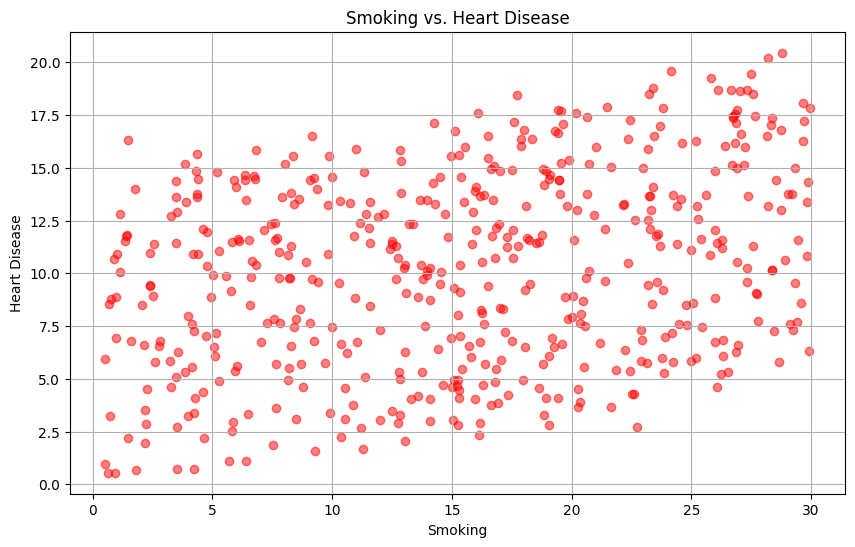

In [141]:
smoking = data['smoking']
heart_disease = data['heart.disease']

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(smoking, heart_disease, color='red', alpha=0.5)
plt.title('Smoking vs. Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Heart Disease')
plt.grid(True)
plt.show()

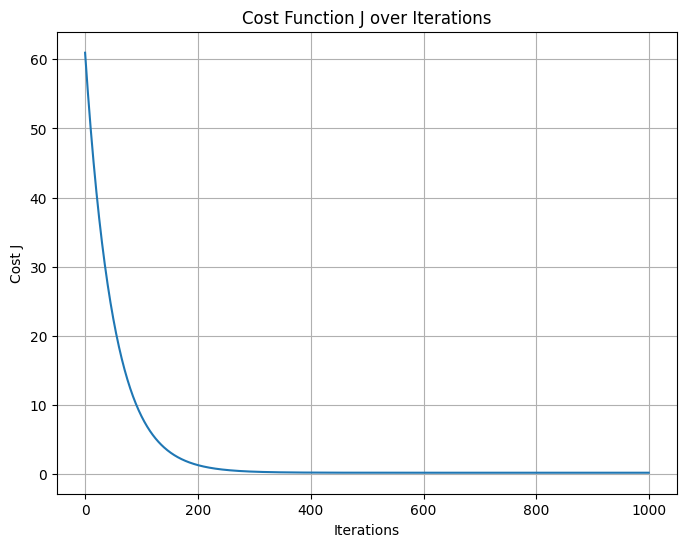

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(cost_path_heart)
plt.title('Cost Function J over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.grid(True)
plt.show()